In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\ruksh\Desktop\Full projects\Drug review\data\drugsComTrain_raw.csv")

In [3]:
df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [4]:
# unque values in each column
for col in df.columns:
    print(f"{col} - {df[col].nunique()}")

uniqueID - 161297
drugName - 3436
condition - 884
review - 112329
rating - 10
date - 3579
usefulCount - 389


In [5]:
df.isna().sum()

uniqueID         0
drugName         0
condition      899
review           0
rating           0
date             0
usefulCount      0
dtype: int64

In [6]:
df.dtypes

uniqueID        int64
drugName       object
condition      object
review         object
rating          int64
date           object
usefulCount     int64
dtype: object

In [7]:
# Highest rated drugs

df["drug"]=df["drugName"].str.split("/").explode("drug").str.lower()

In [8]:
df_rating = df.groupby("drug")["rating"].mean().sort_values(ascending=False)
df_rating.head(20)

drug
zyrtec-d 12 hour                     10.0
regorafenib                          10.0
asendin                              10.0
refresh pm                           10.0
refresh liquigel                     10.0
reese's pinworm medicine             10.0
rea lo 40                            10.0
atrovent nasal                       10.0
rythmol                              10.0
royal jelly                          10.0
anusol-hc suppositories              10.0
romiplostim                          10.0
aveeno                               10.0
avar ls cleanser                     10.0
headache relief pm                   10.0
halog-e                              10.0
hair regrowth treatment for women    10.0
gynazole-1                           10.0
gonal-f                              10.0
glyset                               10.0
Name: rating, dtype: float64

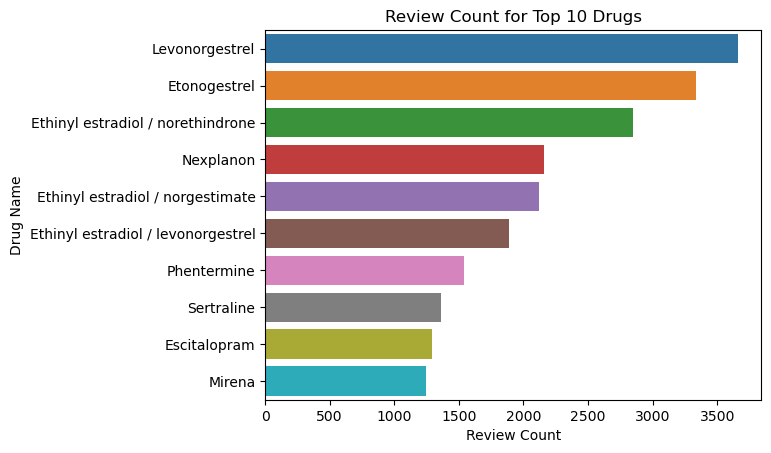

In [9]:
# Review count for top 10 drugs

drug_count = df["drugName"].value_counts().head(10)

sns.barplot(x=drug_count.values, y=drug_count.index, hue=drug_count.index, legend=False)
plt.title("Review Count for Top 10 Drugs")
plt.xlabel("Review Count")
plt.ylabel("Drug Name")
plt.show()


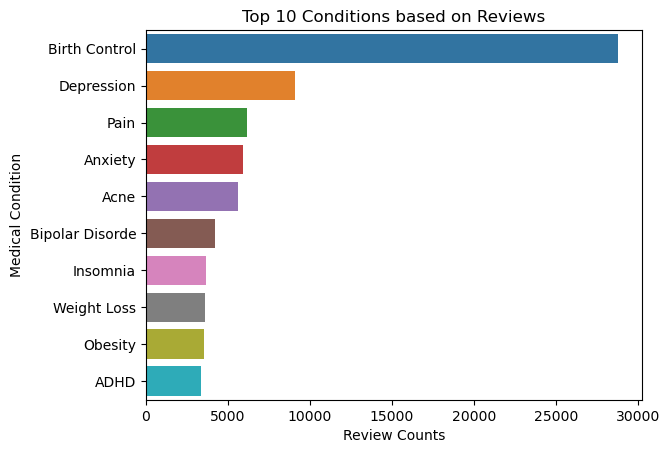

In [10]:
# Top 10 Medical Conditions that people purchased drugs for - based on reviews

condition = df["condition"].value_counts().head(10)

sns.barplot(x=condition.values, y=condition.index , hue=condition.index, legend=False)
plt.title("Top 10 Conditions based on Reviews")
plt.xlabel("Review Counts")
plt.ylabel("Medical Condition")
plt.show()

In [11]:
# Lets try to find most reviewed drugs for borth control

df_birth = df[df["condition"]=="Birth Control"]
df_birth["drug"]=df_birth["drugName"].str.split("/").explode("drug").str.lower()

birth_drugs = df_birth["drug"].value_counts().head(10)

C:\Users\ruksh\AppData\Local\Temp\ipykernel_14396\1096797296.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_birth["drug"]=df_birth["drugName"].str.split("/").explode("drug").str.lower()


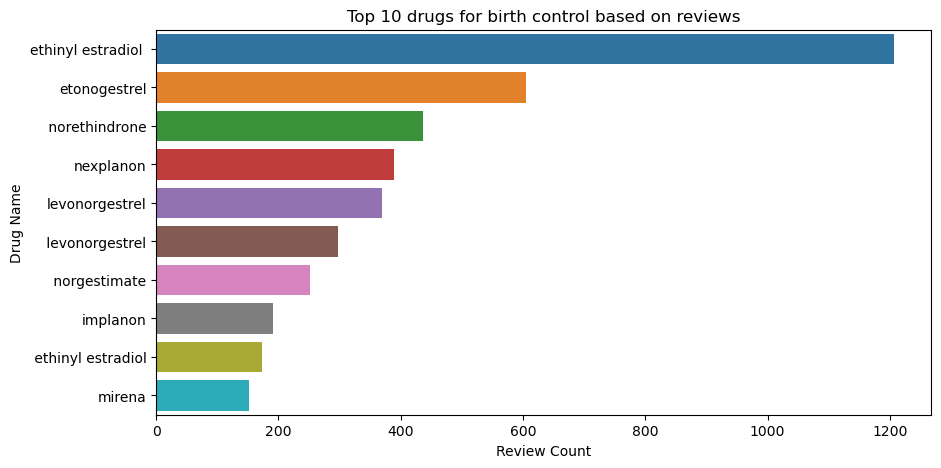

In [15]:
plt.figure(figsize=(10,5))
sns.barplot(x=birth_drugs.values, y=birth_drugs.index, hue=birth_drugs.index, legend=False)
plt.title("Top 10 drugs for birth control based on reviews")
plt.xlabel("Review Count")
plt.ylabel("Drug Name")
plt.show()